##Решение задачи анализа геологических данных

In [3]:
import numpy as np  
import pandas as pd  
from matplotlib import pyplot as plt 
#для построения 3D графиков
from mpl_toolkits.mplot3d import Axes3D  
import seaborn as sns 

%matplotlib inline

https://drive.google.com/file/d/1GSAlv8rIumxpU9daM_aTdzYQ0ZaY0pbn/view?usp=sharing

In [1]:
! gdown 1GSAlv8rIumxpU9daM_aTdzYQ0ZaY0pbn

Downloading...
From: https://drive.google.com/uc?id=1GSAlv8rIumxpU9daM_aTdzYQ0ZaY0pbn
To: /content/data.csv
100% 396k/396k [00:00<00:00, 47.4MB/s]


In [4]:
df = pd.read_csv('/content/data.csv')

###Описательный анализ

In [5]:
df.head()

,skv,X,Y,H,Ip,Il,W,r,rs,e,WL,Wp,jn,E12mk.w,jw,rd,d0.3,cluster,qname
0,25,472959.832133,89880.697030,4.0,3.95,-1.85,8.80,1.84,2.67,0.579,20.06,16.11,NaN,15.68000,22.78,1.69,0.064,Q,L.epIII-H
1,20,473110.225100,89866.519359,6.0,3.38,-1.79,10.50,1.79,2.67,0.648,19.92,16.54,NaN,15.82000,23.27,1.62,0.038,Q,L.epIII-H
2,18,472997.786596,89870.103594,7.0,4.62,-1.46,9.59,1.79,2.67,0.635,20.96,16.34,NaN,14.84000,27.33,1.63,0.034,Q,L.epIII-H
3,25,472959.832133,89880.697030,8.0,3.95,-1.40,10.85,1.82,2.67,0.626,20.33,16.38,NaN,14.84000,27.02,1.64,0.045,Q,L.epIII-H
4,23,472735.225103,89881.976541,8.8,13.10,0.10,19.93,1.91,2.72,0.708,34.30,21.20,NaN,11.42614,16.70,1.59,0.043,Q,L.epIII-H


In [6]:
# Создание словаря с полными названиями показателей
feature_names = {
    'skv': 'Drill Id',
    'X': 'X',
    'Y': 'Y',
    'H':'Depth, m',
    'Ip':'Plasticity index, %',
    'Il':'Liquidity index, dimensionless unit',
    'W':'Water content, %',
    'r':'Soil density, g/cm3',
    'rs':'Solid particles density, g/cm3',
    'e':'Void ratio, dimensionless unit',
    'WL':'Liquid limit, %',
    'Wp':'Plastic limit, %',\
    'jn':'Angle of internal friction (natural water content), degree',
    'E12mk.w':'Modulus of deformation (water-saturated soil), MPa',
    'jw':'Angle of internal friction (water-saturated soil), degree',
    'rd':'Dry soil density, g/cm3',\
    'd0.3':'Collapse potentional, dimensionless unit',
    'cluster' : 'Age',
    'qname' : 'Genesis'
}

In [9]:
#смотрим на размерность данных
print('Размерность данных: количество строк - {0}, количество колонок - {1}'.format(df.shape[0], df.shape[1]))

Размерность данных: количество строк - 3839, количество колонок - 19


In [11]:
print('Описательная статистика данных:')
df.describe()

Описательная статистика данных:


,X,Y,H,Ip,Il,W,r,rs,e,WL,Wp,jn,E12mk.w,jw,rd,d0.3
count,3839.000000,3839.000000,3839.000000,3818.000000,3595.000000,3800.000000,2789.000000,2831.000000,2729.000000,3615.000000,3594.000000,255.000000,180.000000,160.000000,2756.00000,120.000000
mean,464503.412003,89797.255856,7.738776,17.059791,-0.062749,22.706308,1.909909,2.729893,0.790940,41.658304,23.200701,19.060549,16.590404,19.036938,1.55867,0.021100
std,4032.294577,298.180570,7.212860,9.259444,0.396511,12.195723,0.143442,0.040193,0.302026,15.142534,7.735520,5.466760,5.120645,5.732210,0.20243,0.021737
min,460203.978933,89215.968625,0.000000,0.000010,-4.330000,0.000000,1.000000,2.430000,0.224000,15.200000,11.300000,5.090000,4.300000,0.000000,0.77000,0.001000
25%,461131.647213,89548.071170,2.800000,12.000000,-0.257260,15.500000,1.820000,2.700000,0.609000,31.400000,18.410000,15.755000,12.694494,15.640000,1.48000,0.005000
50%,463063.185178,89789.890606,5.200000,15.390000,-0.014925,19.085000,1.930000,2.720000,0.691000,36.300000,20.740000,20.180000,17.364190,19.295000,1.61000,0.016000
75%,466191.931108,89947.685289,9.900000,21.937500,0.190000,26.100000,2.010000,2.750000,0.860000,48.395000,25.000000,23.270000,20.398155,23.030000,1.69000,0.029500
max,473260.081861,90462.665472,45.000000,69.320000,1.198148,89.000000,2.410000,2.960000,2.572000,116.670000,84.600000,29.250000,27.766976,48.000000,2.20000,0.140000


Убираем дубликаты

In [12]:
coordinates = df[['X', 'Y']].drop_duplicates()

In [13]:
print('Количество уникальных расположений:', coordinates.shape[0])
print('Количество уникальных ID скважин:', df['skv'].unique().shape[0])
print('Среднее количество образцов на 1 уникальный ID скважины:', round(df['skv'].value_counts().mean()))

Количество уникальных расположений: 981
Количество уникальных ID скважин: 914
Среднее количество образцов на 1 уникальный ID скважины: 4


In [16]:
print('Статистика по образцам на 1 уникальный ID скважины:')
print(df['skv'].value_counts().describe())

Статистика по образцам на 1 уникальный ID скважины:
count    914.000000
mean       4.200219
std        3.557440
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       28.000000
Name: skv, dtype: float64


###Исследование и визуализация данных 

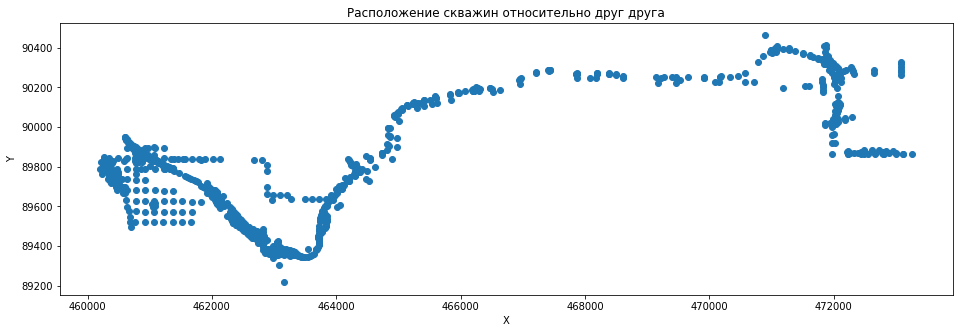

In [21]:
plt.figure(figsize=(16,5))
plt.plot(coordinates['X'], coordinates['Y'], 'o')
plt.title('Расположение скважин относительно друг друга')
plt.xlabel(feature_names['X'])
plt.ylabel(feature_names['Y'])
plt.show()

Построение 3d графика - "Расположение скважин в пространстве"

No handles with labels found to put in legend.


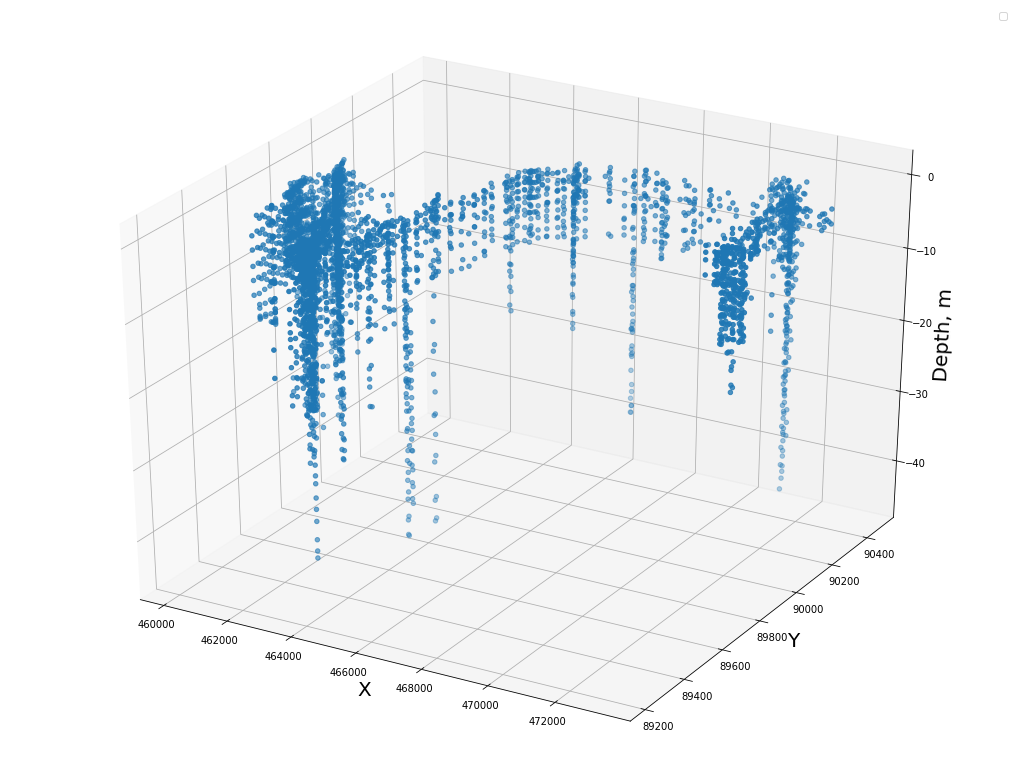

In [23]:
fig = plt.figure(figsize=(18,14))  # установка размера рамки графика
ax = fig.add_subplot(111, projection='3d')  # создание 3D рамки
ax.scatter(df['X'], df['Y'], -df['H'], marker='o')  # создание 3D диаграммы рассеяния с явным указанием типа графика и названия графика для отображения в легенде

#подписи осей
ax.set_xlabel(feature_names['X'], fontsize=20)  
ax.set_ylabel(feature_names['Y'], fontsize=20)  
ax.set_zlabel(feature_names['H'], fontsize=20)  
#создание легенды
ax.legend() 

plt.show()

Распредение скважин по глубине

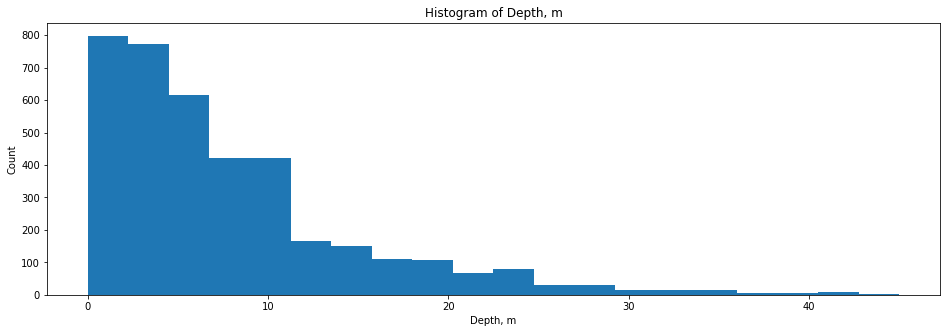

In [24]:
plt.figure(figsize=(16,5))
plt.hist(df['H'], bins=20)
plt.title('Histogram of %s' % feature_names['H'])
plt.xlabel(feature_names['H'])
plt.ylabel('Count')
plt.show()

Корреляция

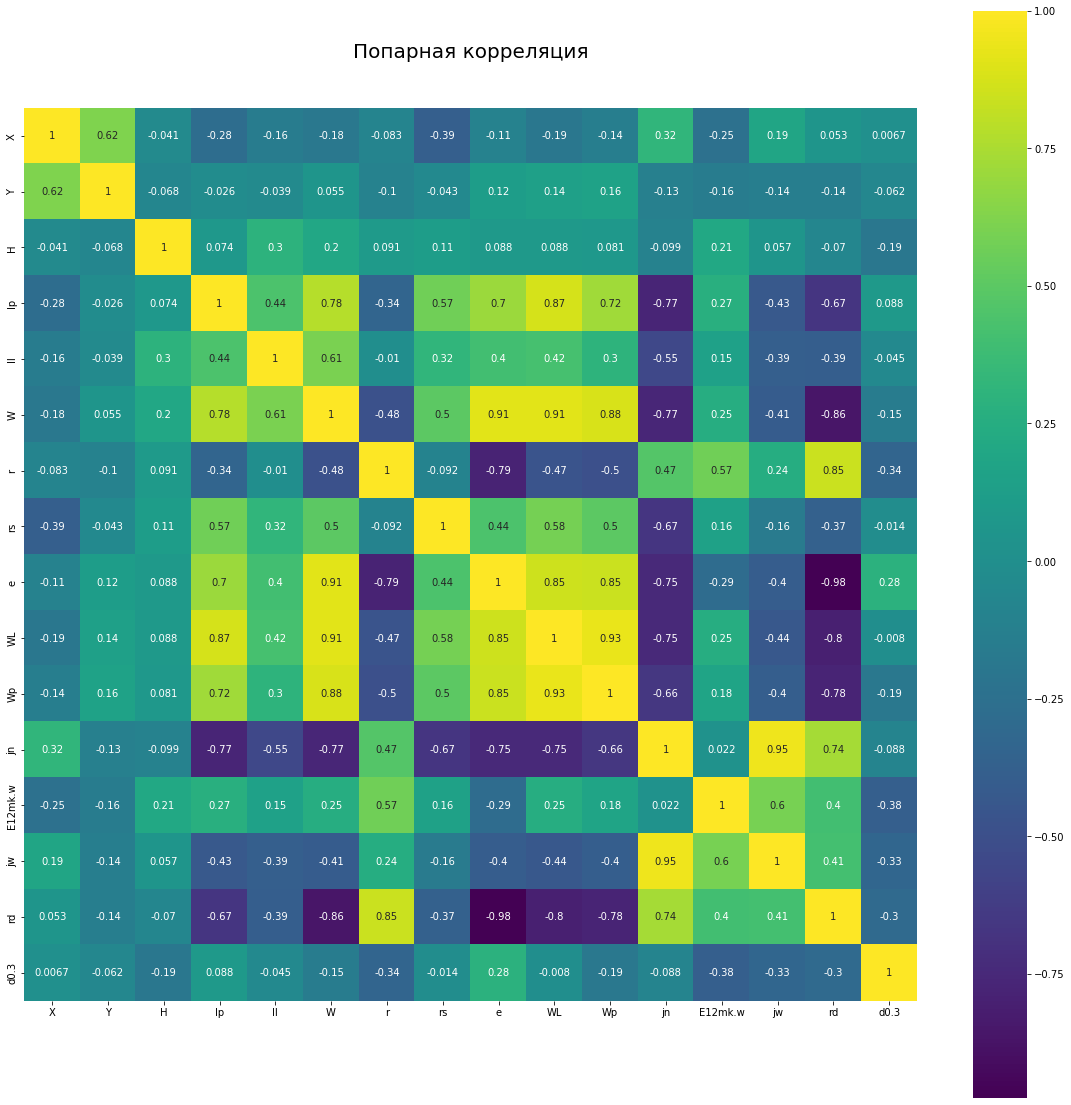

In [25]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Попарная корреляция', y=1.05, size=20)
sns.heatmap(df.corr(), square=True, annot=True, cmap=colormap)
plt.show()

In [31]:
# Диаграммы рассеяния для тех пар показателей, у которых высокая степень корреляции или антикорреляции
df_corr = df.corr().unstack().reset_index()

In [ ]:
high_corr_features = df_corr[(np.abs(df_corr[0]) > 0.75) & (df_corr['level_0'] != df_corr['level_1'])].values

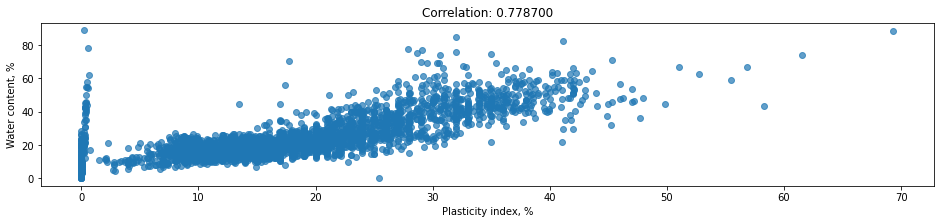

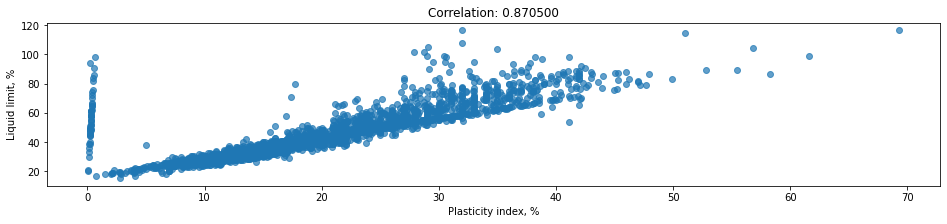

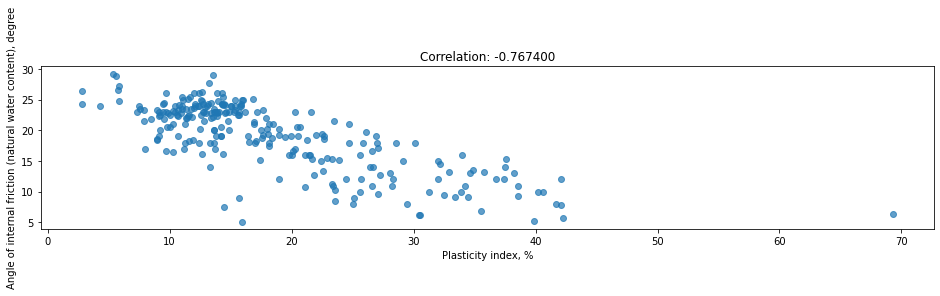

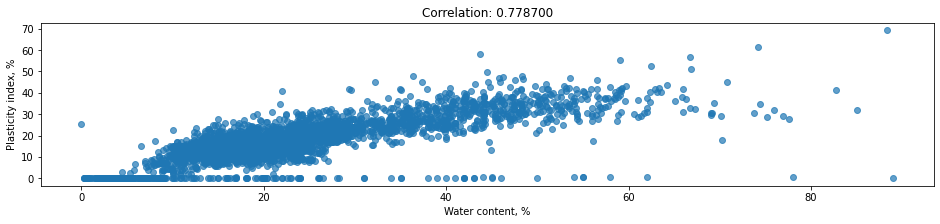

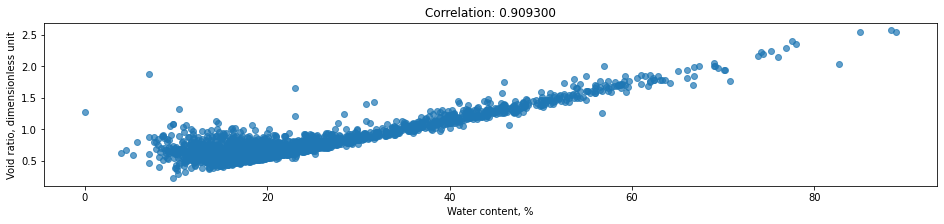

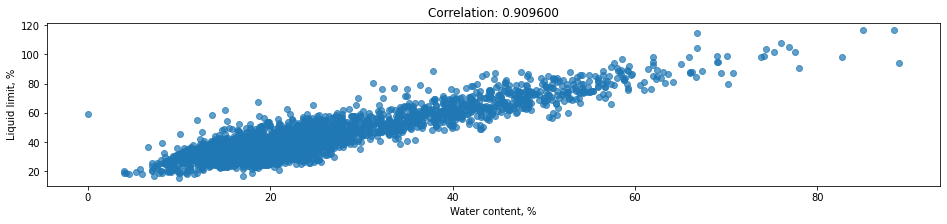

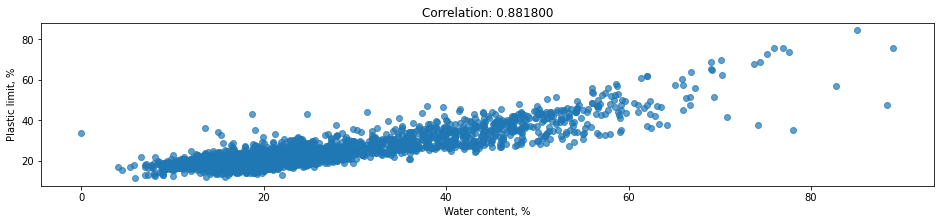

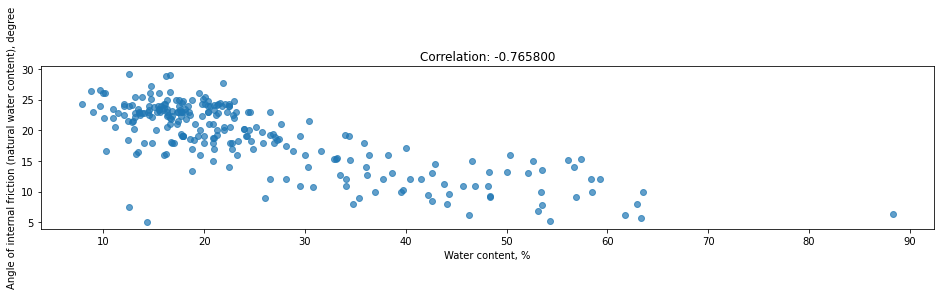

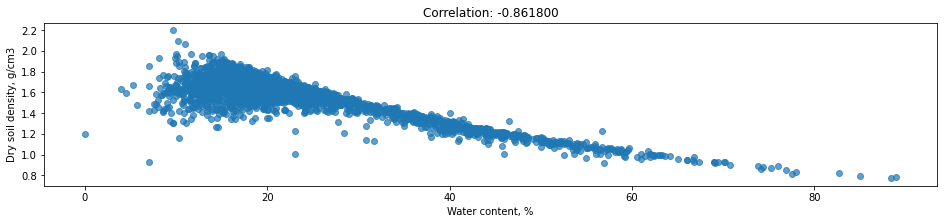

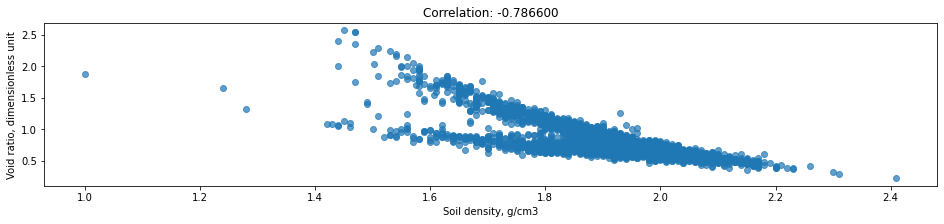

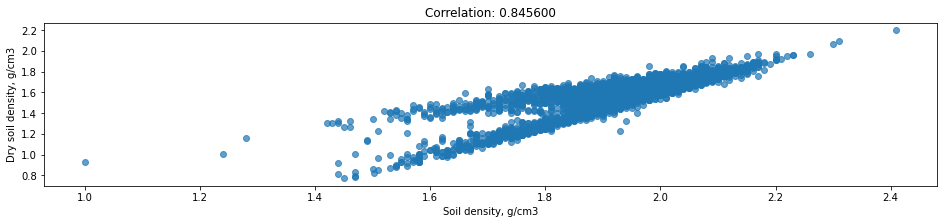

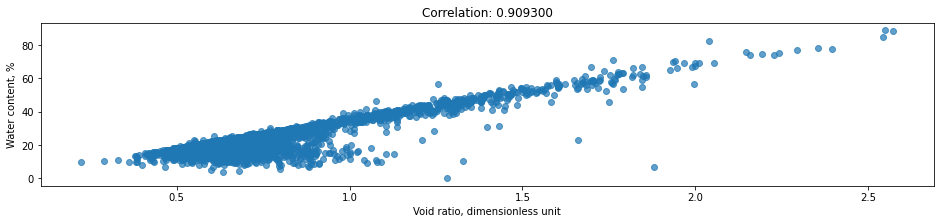

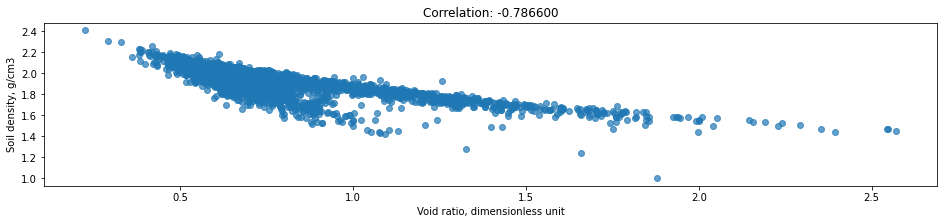

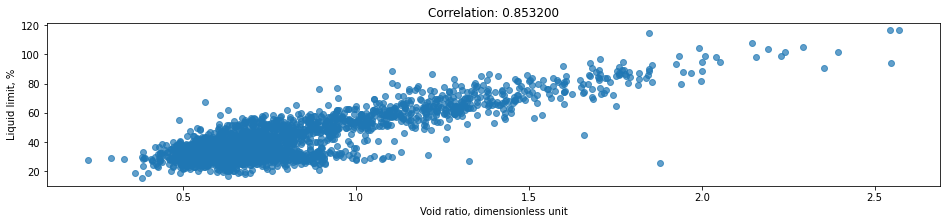

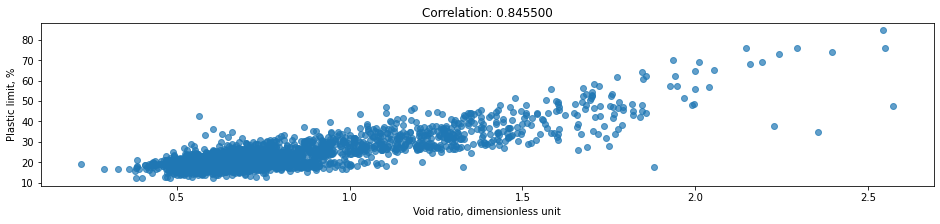

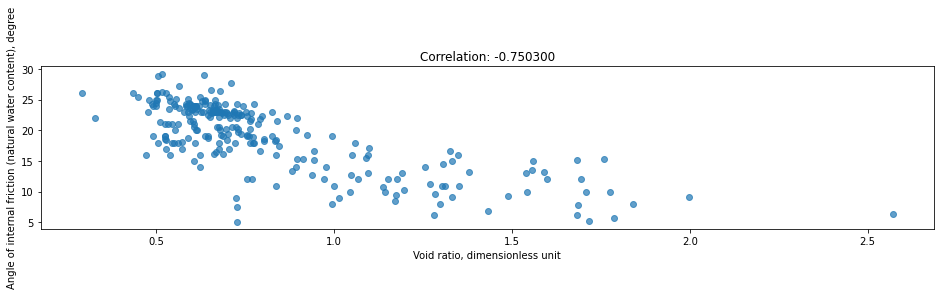

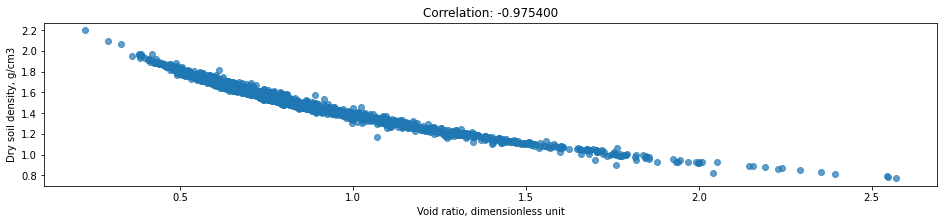

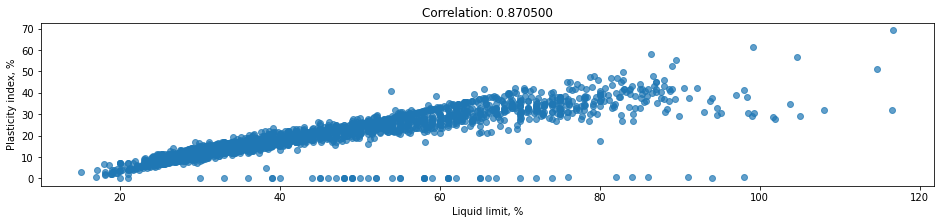

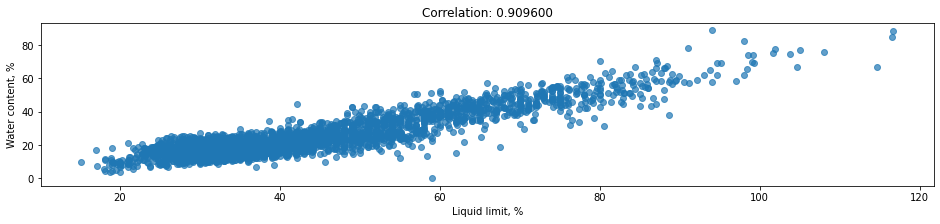

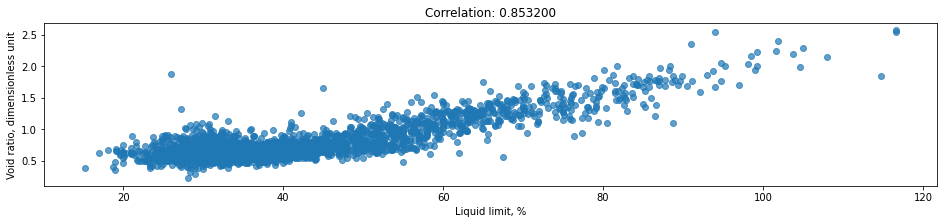

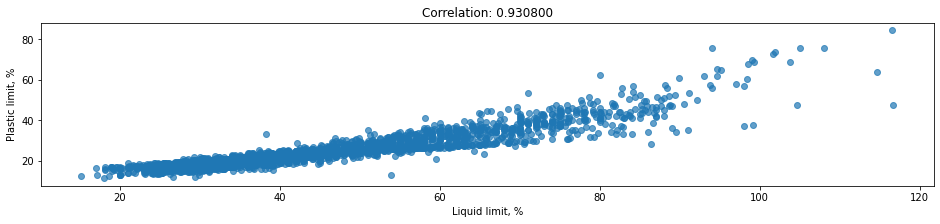

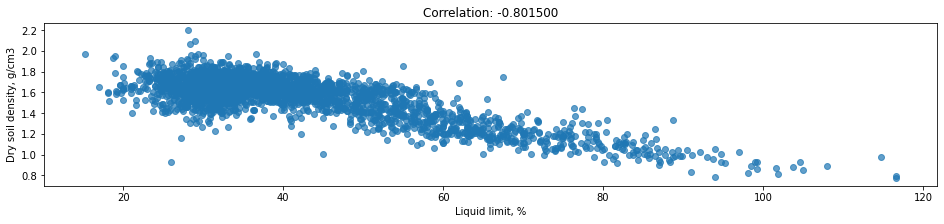

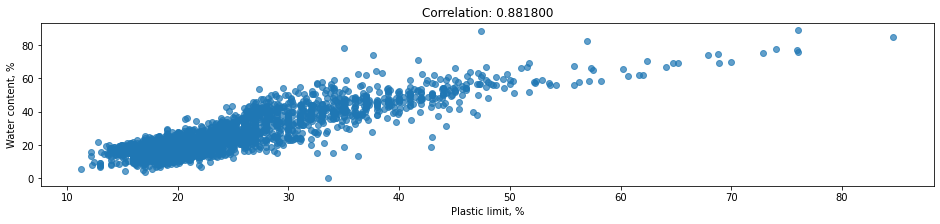

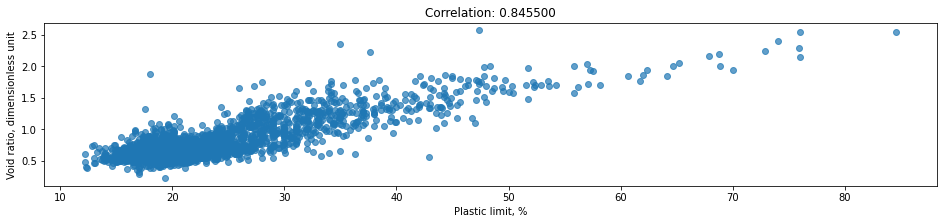

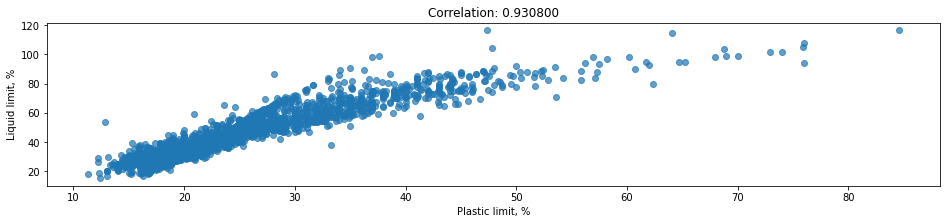

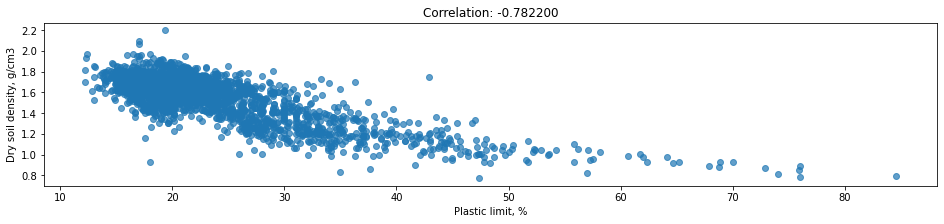

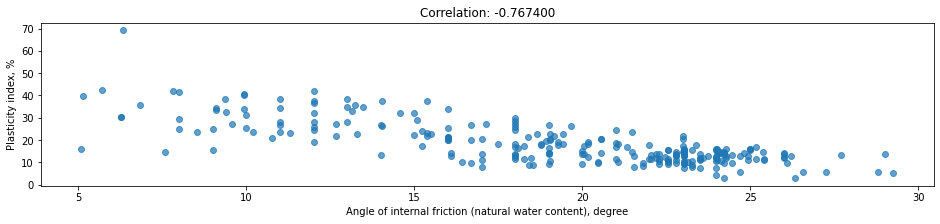

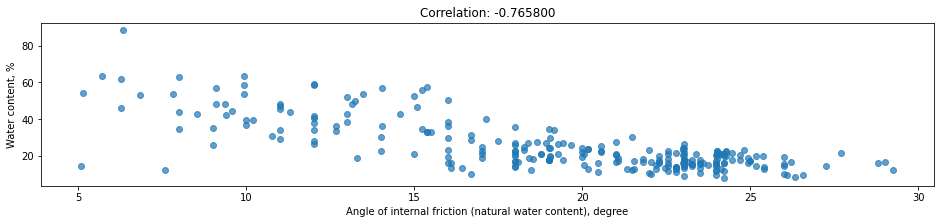

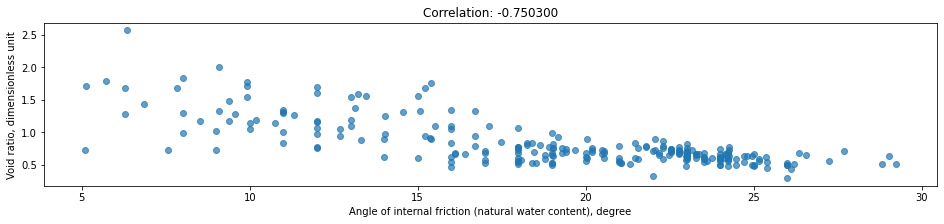

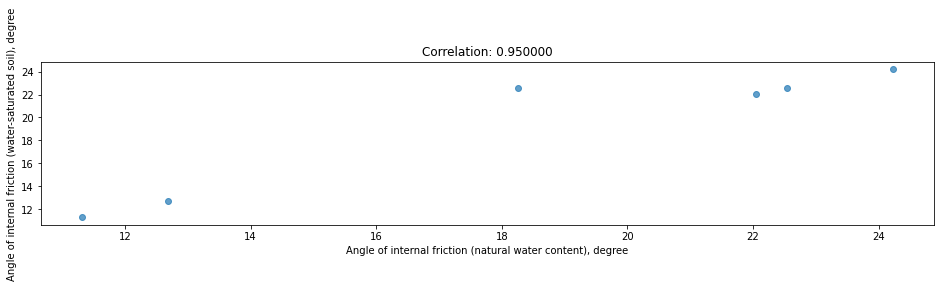

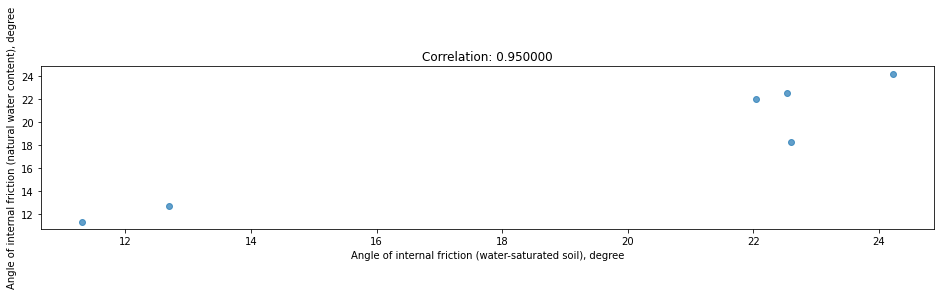

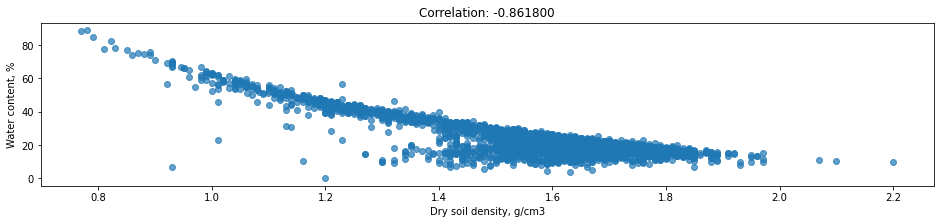

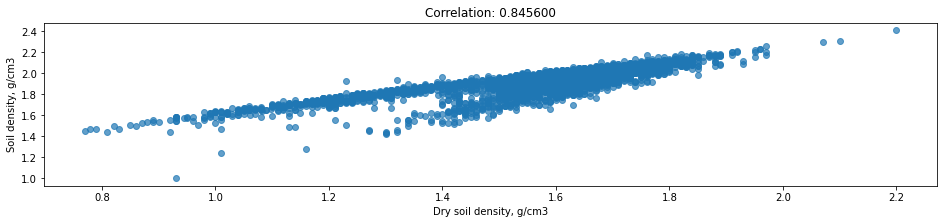

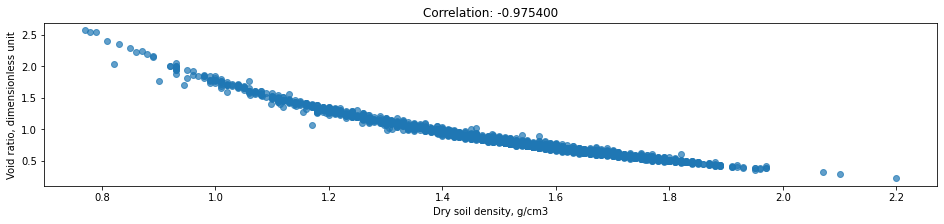

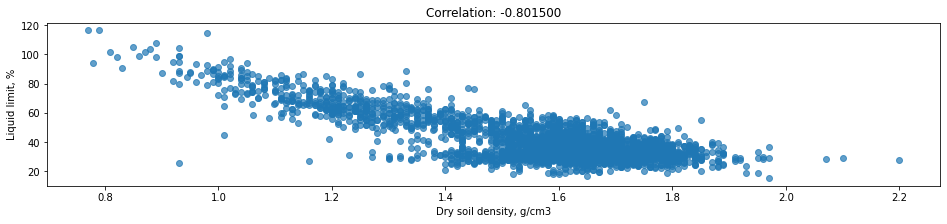

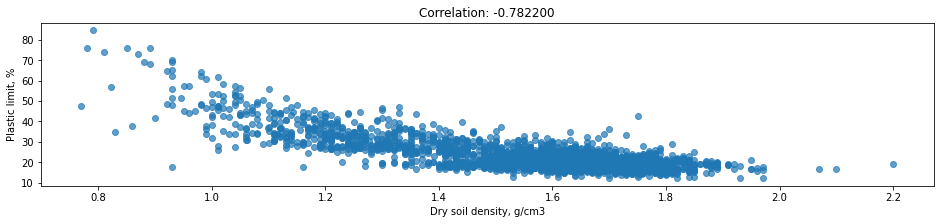

In [36]:
for feature_pair in high_corr_features:
    plt.figure(figsize=(16,3))
    plt.plot(df[feature_pair[0]], df[feature_pair[1]], 'o', alpha=0.7)
    plt.title('Correlation: %f' % round(feature_pair[2], 4))
    plt.xlabel(feature_names[feature_pair[0]])
    plt.ylabel(feature_names[feature_pair[1]])
    plt.show()

### Сравнительный анализ по категориальным переменным

In [37]:
# Убираем пустые значения в категориальной переменной, характеризующей принадлежность 
# грунтов к глобальному возрасту
df_clust = df[pd.notnull(df['cluster'])]

In [40]:
df_clust['cluster']

0       Q
1       Q
2       Q
3       Q
4       Q
       ..
3829    Q
3830    Q
3833    N
3834    N
3835    Q
Name: cluster, Length: 2718, dtype: object

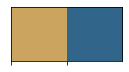

In [38]:
# Создаем палетку для визуализации двух основных кластеров грунтов
q_n_palette = ['#cba560', '#31668a'] ##'Q':'#cba560', 'N':'#31668a'
sns.set_palette(q_n_palette)
sns.palplot(sns.color_palette())

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 6.800000000000011, 'Age')

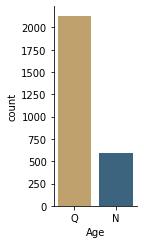

In [41]:
# Оцениваем сбалансированность выборки
sns.factorplot("cluster",data=df_clust, kind="count", size=3.5, aspect=0.6)
plt.xlabel(feature_names['cluster'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(3.6750000000000043, 0.5, 'Liquid limit, %')

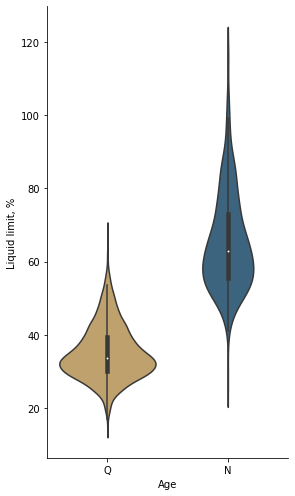

In [42]:
# Визуализируем сравнительный разброс значений в пределах каждого возраста по 
# единичному показателю свойств грунтов (WL)
vp=sns.factorplot(x="cluster", y="WL", data=df_clust,  
                  size=7, aspect=0.6, kind="violin",
                  orient='v',
                  palette=q_n_palette)
plt.xlabel(feature_names['cluster'])
plt.ylabel(feature_names['WL'])
#plt.ylim(15, 90)

In [43]:
# Убираем пустые значения в категориальной переменной, характеризующей принадлежность 
# грунтов к четвертичному возрасту и уникальный генезис
df_clust_q = df[pd.notnull(df['qname'])]

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 6.799999999999983, 'Genesis')

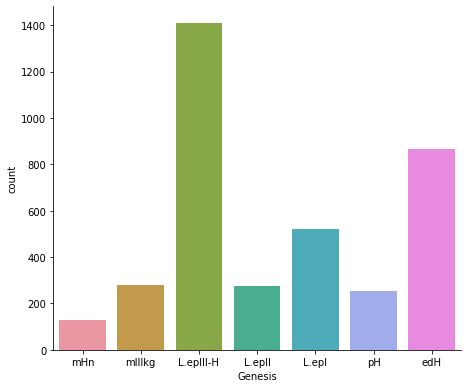

In [44]:
# Оцениваем сбалансированность выборки
sns.factorplot("qname",data=df_clust_q, 
               order=['mHn','mIIIkg','L.epIII-H', 'L.epII','L.epI', 'pH','edH'],
               kind="count", size=5.5, aspect=1.2)
plt.xlabel(feature_names['qname'])

In [49]:
pip install QtGui

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for QtGui: filename=qtgui-0.0.1-py3-none-any.whl size=10315 sha256=6100ef7ef9c2779f9a4289853fe79a4a4e89492f6ecaf5dc731736ccf5fd784b
  Stored in directory: /root/.cache/pip/wheels/41/a8/28/67688c06a2e91ebfd472592a612bd9568140ff4c4e02134b0f
Successfully built QtGui


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(10.050000000000004, 0.5, 'Plasticity index, %')

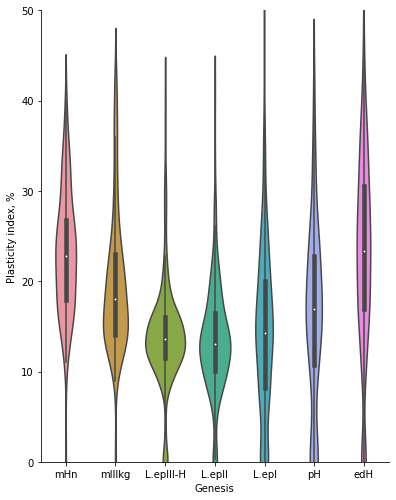

In [51]:
# Визуализируем сравнительный разброс значений в пределах каждого генетического типа по 
# единичному показателю свойств грунтов (Ip)
vp=sns.factorplot(x="qname", y="Ip", data=df_clust_q, 
                  order= ['mHn','mIIIkg','L.epIII-H', 'L.epII','L.epI', 'pH','edH'], 
                  size=7, aspect=0.8, kind="violin",
                  orient='v')
plt.ylim(0, 50)
plt.xlabel(feature_names['qname'])
plt.ylabel(feature_names['Ip'])